In [292]:
# importing some libs so that we can work with data easily :)
# all of the compution is done on colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [293]:
# reading the csv file by using pandas :)
df = pd.read_csv('ahmedabad.csv' , encoding='utf-8')

In [294]:
df.index

RangeIndex(start=0, stop=6853, step=1)

In [295]:
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Unnamed: 0      0.000000
Title           0.000000
type_area       0.000000
value_area      0.000000
status          0.000000
floor           0.116737
transaction     0.306435
furnishing      0.539910
facing          1.298701
price           0.000000
price_sqft      6.537283
description    25.769736
dtype: float64


# all the data cleaning and feature engineering

In [296]:
df.isnull().sum()

,0
Unnamed: 0,0
Title,0
type_area,0
value_area,0
status,0
floor,8
transaction,21
furnishing,37
facing,89
price,0


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6853 non-null   int64 
 1   Title        6853 non-null   object
 2   type_area    6853 non-null   object
 3   value_area   6853 non-null   object
 4   status       6853 non-null   object
 5   floor        6845 non-null   object
 6   transaction  6832 non-null   object
 7   furnishing   6816 non-null   object
 8   facing       6764 non-null   object
 9   price        6853 non-null   object
 10  price_sqft   6405 non-null   object
 11  description  5087 non-null   object
dtypes: int64(1), object(11)
memory usage: 642.6+ KB


In [298]:
df.isnull().sum()

,0
Unnamed: 0,0
Title,0
type_area,0
value_area,0
status,0
floor,8
transaction,21
furnishing,37
facing,89
price,0


In [299]:
df['price_sqft'].isnull().sum()

np.int64(448)

In [300]:
# DROP the description
df = df.drop(['description', 'Unnamed: 0'], axis=1)

In [301]:
# quick look into the data-set :)
df.head(5)

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,price_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",Super Area,155 sqyrd,Poss. by Dec '26,New Property,Unfurnished,Vivaan Aura,2,â‚¹48.1 Lac,"â‚¹3,444 per sqft"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",Carpet Area,710 sqft,Poss. by Jun '27,New Property,Unfurnished,SP Epitome,2,â‚¹50 Lac,"â‚¹3,876 per sqft"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",Carpet Area,588 sqft,Poss. by Dec '25,New Property,Unfurnished,Pacifica Amara,2,â‚¹40 Lac,"â‚¹3,738 per sqft"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",Carpet Area,687 sqft,Poss. by Jun '26,New Property,Unfurnished,Kavisha AER,2,â‚¹48.8 Lac,"â‚¹3,900 per sqft"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",Carpet Area,621 sqft,Poss. by Mar '25,New Property,Unfurnished,Aarambh Vistara,2,â‚¹48 Lac,"â‚¹4,248 per sqft"


In [302]:
import re
def clean_price(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()

    return re.sub(r'^[^0-9A-Za-z]+','',val)


def price_conversion(val):
    if 'Lac' in val:
        return float(val.replace('Lac', "").strip()) *1e5
    elif "Cr" in val:
        return float(val.replace('Cr', "").strip()) *1e7
    elif "Call for Price" in val:
        return str(val.strip())
    else:
        return float(val.strip())

def remove_str(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()
    return re.sub(r'[^0-9]+','', val)



df['price'] = df['price'].apply(clean_price)
df['price_sqft'] = df['price_sqft'].apply(clean_price)
df['price_sqft'] = df['price_sqft'].apply(remove_str)
df['price'] = df['price'].apply(price_conversion)

In [303]:
df['type_area'].unique()

array(['Super Area', 'Carpet Area', 'Transaction', 'Status', 'Built Area',
       'Under Construction'], dtype=object)

In [304]:
df['price_sqft'].unique()

array(['3444', '3876', '3738', ..., '10121', '8984', '11250'],
      dtype=object)

In [305]:
df['type_area'] = df['type_area'].replace({
    "Super Area": 'super area',
    'Carpet Area': 'carpet area',
    'Transaction': None,
    'Status': None,
    'Under Construction': 'under construction'
} )

df['type_area'].unique()

array(['super area', 'carpet area', None, 'Built Area',
       'under construction'], dtype=object)

In [306]:
df['status'].unique()

array(["Poss. by Dec '26", "Poss. by Jun '27", "Poss. by Dec '25",
       "Poss. by Jun '26", "Poss. by Mar '25", "Poss. by Jul '24",
       "Poss. by Jul '26", "Poss. by Dec '24", 'Ready to Move',
       "Poss. by May '26", "Poss. by Nov '24", "Poss. by Oct '25",
       "Poss. by Jan '26", "Poss. by Aug '24", "Poss. by Oct '24",
       "Poss. by Feb '28", "Poss. by Sep '25", "Poss. by Mar '26",
       "Poss. by Jan '25", "Poss. by Nov '25", "Poss. by Dec '27",
       "Poss. by Sep '24", '4 out of 5', '1 out of 1', '3 out of 3',
       '3 out of 5', '3 out of 4', "Poss. by Jun '25", '4 out of 10',
       '4 out of 4', 'Bapunagar One', '2 out of 3', '3 out of 9',
       '7 out of 8', "Poss. by Jun '24", '5 out of 5', '1 out of 4',
       '1 out of 14', '13 out of 13', '2 out of 5', '9 out of 14',
       '8 out of 14', "Poss. by Mar '27", "Poss. by Jul '25",
       "Poss. by May '24", "Poss. by Aug '25", "Poss. by Feb '25",
       "Poss. by Apr '25", "Poss. by Dec '28", "Poss. by Apr '26

In [307]:
def status_clean(val):
    val = str(val)

    if "Poss." in val or "Ready to Move" in val or "Under Construction" in val:
        return ("possession", val)
    if val in ["New Property", "Resale"]:
        return ('transaction', val)
    if "out of" in val:
        return ("floor", val)

    if "Const. Age" in val:
        return ("age" , val)

    return ('project', val)

df[['status_type', 'status_value']] = df['status'].apply(status_clean).apply(pd.Series)
df.drop(['status'], axis=1 , inplace=True)

In [308]:
df['status_value'][11]

'Ready to Move'

In [309]:
df['status_type'][11]

'possession'

In [310]:

# df.sample()
df['facing'].unique()

array(['2', '1 Covered', 'East', 'Garden/Park', 'North - East', 'North',
       'Main Road', 'North - West', 'West', '1',
       'Garden/Park, Pool, Main Road', 'Garden/Park, Main Road',
       'Vandematram City', '1 Covered,', 'Garden Paradise',
       'Parshwanath Atlantis Park', 'Shukun Heights', 'South - East',
       'Radheshyam Residency', 'Shrifal Apartment', 'Omro Anmol Avenue',
       'Main Road, Garden/Park, Pool', 'Silver Pearl', 'South -West',
       'Savvy Studioz', 'Sainath Avenue', 'Shreeji Tulsi Heights',
       'Soham Sanidhya', 'Dev Darshan Apartment', 'Ashraya 10',
       'Freehold', 'Sarvopari Elegance',
       'Jigish Rohitbhai Patel Jahnvi Residency Phase 2',
       'Saanvi Aarambh', '3', 'Suryam Elegance', 'Shyam Tirth',
       'Karnavati 3', 'Nijanand Pushkar Elegance', 'Shakti Gardenia',
       'Siddharth Icon', 'Sun Real Homes', 'Shilp Solace',
       'VandeMatram Prime', 'Laxmi Nivas', 'Rashmi Vihar', 'Shilp Ananta',
       'Green City', 'Sun Rising Homes', n

In [311]:
# it is to check the no of rows and columns in the data-set :)
x = df.shape
print('This data-set has', x[0] , "rows" , 'and' ,x[-1] , "columns")

This data-set has 6853 rows and 11 columns


In [312]:
# we can also need to check data type so there are some couple of ways for it w'll use .dtype method for now
print('data type of the data present in the columns are give below')
print('')
print(df.dtypes)

data type of the data present in the columns are give below

Title           object
type_area       object
value_area      object
floor           object
transaction     object
furnishing      object
facing          object
price           object
price_sqft      object
status_type     object
status_value    object
dtype: object


In [313]:
# null values per column
df.isnull().sum()

,0
Title,0
type_area,4
value_area,0
floor,8
transaction,21
furnishing,37
facing,89
price,0
price_sqft,448
status_type,0


In [314]:
df.duplicated().sum()

np.int64(298)

In [315]:
df = df.drop_duplicates()

In [316]:
df['type_area'].unique()

array(['super area', 'carpet area', None, 'Built Area',
       'under construction'], dtype=object)

In [317]:
# missing values :)
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Title           0.000000
type_area       0.045767
value_area      0.000000
floor           0.091533
transaction     0.259344
furnishing      0.488177
facing          1.266209
price           0.000000
price_sqft      6.498856
status_type     0.000000
status_value    0.000000
dtype: float64


In [318]:
df.head()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,price_sqft,status_type,status_value
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,3444,possession,Poss. by Dec '26
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,3876,possession,Poss. by Jun '27
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,3738,possession,Poss. by Dec '25
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,3900,possession,Poss. by Jun '26
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,4248,possession,Poss. by Mar '25


In [319]:
# not so important but still if you want you can try storing name of fetaures in variable for record :)

columns = list(df.columns)
columns

['Title',
 'type_area',
 'value_area',
 'floor',
 'transaction',
 'furnishing',
 'facing',
 'price',
 'price_sqft',
 'status_type',
 'status_value']

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6555 entries, 0 to 6852
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         6555 non-null   object
 1   type_area     6552 non-null   object
 2   value_area    6555 non-null   object
 3   floor         6549 non-null   object
 4   transaction   6538 non-null   object
 5   furnishing    6523 non-null   object
 6   facing        6472 non-null   object
 7   price         6555 non-null   object
 8   price_sqft    6129 non-null   object
 9   status_type   6555 non-null   object
 10  status_value  6555 non-null   object
dtypes: object(11)
memory usage: 614.5+ KB


In [321]:
df.sample()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,price_sqft,status_type,status_value
3468,"3 BHK Apartment for Sale in Shlok elysium, Gha...",carpet area,2538 sqft,6 out of 13,Resale,Semi-Furnished,Shlok elysium,17500000.0,NaN,possession,Ready to Move


In [322]:
df["transaction"].unique()

array(['Unfurnished', 'New Property', 'Resale', 'Semi-Furnished',
       'Furnished', 'Shakti Gardenia', 'Other', nan,
       'Gajanan Dev Home Town 4', 'Karnavati Apartment II',
       'Sangani Platinum', 'Saujanya II', 'Harsh Apartment',
       'Bhagwat Elysium', 'Swati Greens', 'Shivalik Sharda Park View 2',
       'Freehold', 'Harshdip Avadh Elegance', 'Bakeri City', '3',
       'Veer Savarker Heights 2 Vasantnagar', 'Galaxy Gala Laxuria',
       'Garden/Park', 'Orchid Heaven', '14 Covered',
       'Shree Balaji Wind Park', 'Samyak 49', '24 Karat', 'The Indus',
       'Super Shaligram', 'Times 40'], dtype=object)

In [323]:
df = df.drop(['price_sqft'], axis=1)

In [324]:
df['Title'][9]

'2 BHK Apartment for Sale in Sun Parkwest, Shela Ahmedabad'

In [325]:
df.sample(5)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value
1679,3 BHK Apartment for Sale in Motera Ahmedabad,carpet area,1103 sqft,Resale,Unfurnished,West,"Garden/Park, Pool, Main Road",9500000.0,possession,Ready to Move
1125,"2 BHK Apartment for Sale in Rajpath Rowhouse, ...",carpet area,810 sqft,6 out of 10,Resale,Furnished,East,4500000.0,possession,Ready to Move
5094,"4 BHK Apartment for Sale in Riviera Palacio, S...",carpet area,3829 sqft,32 out of 37,New Property,Unfurnished,North,42400000.0,possession,Poss. by Dec '29
2858,3 BHK Builder Floor for Sale in TP 85 Ahmedabad,super area,235 sqyrd,6 out of 6,Resale,Unfurnished,3,9000000.0,possession,Ready to Move
1394,2 BHK Apartment for Sale in Sanand Ahmedabad,carpet area,1270 sqft,3 out of 5,Resale,Unfurnished,Main Road,4000000.0,possession,Ready to Move


In [326]:
# clean columns
# 1 type area ----------------- looks good
# 2 value area ------------ just convert sqft and sqm , sqyrd to one singel type
# 3 floor ----------------- convert to 1/7 or something like it form
# 4 transcations -------------- looks useless so may be drop it
# 5 furnishing -------------------- search google or chatgpt as i cant under stand data
# 6 facing ----------------------- make it direction only  or for good drop it as it is not releivent data
# 7 Flat type(new column from title)----------- like 1 BHK , 2 BHK or other
# 8 loaction or building name ---------- from title (after in and before ,)

# so there will be about 7-8 meaningful columns after this

In [327]:
def flat_type(text):
    match = re.search(r'(\d+)', text , re.IGNORECASE)
    if match:
        return match.group(0)
    return None


df['BHK'] = df['Title'].apply(flat_type)

In [328]:
def location(text):
    match = re.search(r'\bin\b\s+(.*)', text , re.IGNORECASE)
    if match:
        return match.group(1)
    return None

df['location'] = df['Title'].apply(location)

In [329]:
df.sample(10)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location
2190,"3 BHK Apartment for Sale in Turquoise Greenz, ...",super area,1750 sqft,Resale,Unfurnished,Turquoise Greenz,2,7500000.0,floor,10 out of 12,3,"Turquoise Greenz, Shela Ahmedabad"
6236,"5 BHK Penthouse for Sale in Oeuvre Iconic, Bod...",carpet area,3081 sqft,32 out of 33,Resale,Unfurnished,East,50400000.0,possession,Poss. by Jun '26,5,"Oeuvre Iconic, Bodakdev Ahmedabad"
3642,"4 BHK Apartment for Sale in Orchid Legacy, Sar...",super area,2585 sqft,1 out of 18,Resale,Unfurnished,Orchid Legacy,17500000.0,possession,Ready to Move,4,"Orchid Legacy, Sardar Patel Ring Road Ahmedabad"
303,"2 BHK Apartment for Sale in Shakti Gardenia, V...",super area,945 sqft,5 out of 5,Resale,Semi-Furnished,Shakti Gardenia,2500000.0,possession,Ready to Move,2,"Shakti Gardenia, Vatva Ahmedabad"
2684,2 BHK Apartment for Sale in Ram Ratan Elite Sm...,super area,1240 sqft,7 out of 7,Resale,Furnished,"Garden/Park, Main Road",5850000.0,possession,Ready to Move,2,"Ram Ratan Elite Smart Homes, New Ranip Ahmedabad"
2696,2 BHK Apartment for Sale in Satellite Ahmedabad,super area,115 sqyrd,1 out of 10,Resale,Furnished,2,6000000.0,possession,Ready to Move,2,Satellite Ahmedabad
5176,4 BHK Apartment for Sale in Shilaj Ahmedabad,carpet area,3135 sqft,18 out of 22,New Property,Unfurnished,East,38200000.0,possession,Poss. by Mar '26,4,Shilaj Ahmedabad
2005,3 BHK Apartment for Sale in Shalimar Flat Shah...,super area,125 sqyrd,1 out of 5,Resale,Furnished,2,8500000.0,possession,Ready to Move,3,Shalimar Flat Shahibaug Ahmedabad
116,"2 BHK Apartment for Sale in Vrundavan Vihar, V...",carpet area,133 sqyrd,2 out of 5,Resale,Unfurnished,East,3700000.0,possession,Ready to Move,2,"Vrundavan Vihar, Vastral Ahmedabad"
983,2 BHK Apartment for Sale in Vastral Ahmedabad,super area,850 sqft,1 out of 8,Resale,Semi-Furnished,2,4100000.0,possession,Ready to Move,2,Vastral Ahmedabad


In [330]:
df.isnull().sum()

,0
Title,0
type_area,3
value_area,0
floor,6
transaction,17
furnishing,32
facing,83
price,0
status_type,0
status_value,0


In [331]:
df.head(10)

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,possession,Poss. by Dec '26,2,"Vivaan Aura, Zundal Ahmedabad"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,possession,Poss. by Jun '27,2,"SP Epitome, Shela Ahmedabad"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,possession,Poss. by Dec '25,2,"Pacifica Amara, Sanand Ahmedabad"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,possession,Poss. by Jun '26,2,"Kavisha AER, Shela Ahmedabad"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,possession,Poss. by Mar '25,2,"Aarambh Vistara, Gota Ahmedabad"
5,"2 BHK Apartment for Sale in Vivaan Essence, Zu...",super area,1413 sqft,New Property,Unfurnished,Vivaan Essence,1 Covered,4990000.0,possession,Poss. by Jun '26,2,"Vivaan Essence, Zundal Ahmedabad"
6,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,700 sqft,7 out of 14,New Property,Unfurnished,East,4910000.0,possession,Poss. by Dec '25,2,"Kavisha AER, Shela Ahmedabad"
7,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",carpet area,85 sqyrd,11 out of 14,New Property,Unfurnished,East,4840000.0,possession,Poss. by Jun '26,2,"Vivaan Aura, Zundal Ahmedabad"
8,"2 BHK Apartment for Sale in Kavisha Atria, She...",carpet area,655 sqft,New Property,Unfurnished,North - East,Garden/Park,4520000.0,possession,Poss. by Jul '24,2,"Kavisha Atria, Shela Ahmedabad"
9,"2 BHK Apartment for Sale in Sun Parkwest, Shel...",carpet area,676 sqft,5 out of 14,New Property,Unfurnished,East,4260000.0,possession,Poss. by Jul '26,2,"Sun Parkwest, Shela Ahmedabad"


In [332]:
df['location'].unique().tolist()

['Vivaan Aura, Zundal Ahmedabad',
 'SP Epitome, Shela Ahmedabad',
 'Pacifica Amara, Sanand Ahmedabad',
 'Kavisha AER, Shela Ahmedabad',
 'Aarambh Vistara, Gota Ahmedabad',
 'Vivaan Essence, Zundal Ahmedabad',
 'Kavisha Atria, Shela Ahmedabad',
 'Sun Parkwest, Shela Ahmedabad',
 'Shilp Ananta, Shela Ahmedabad',
 'Zundal Ahmedabad',
 'Savvy Studioz, Jagatpur Ahmedabad',
 'Devam, Jagatpur Ahmedabad',
 'Orchid Blues, Shela Ahmedabad',
 'Aadhvan Rise, South Bopal, Bopal Ahmedabad',
 'Atlantis wave Ahmedabad',
 'Zaveri Greens, Ghuma Ahmedabad',
 'Mahadev Lavish, South Bopal, Bopal Ahmedabad',
 'Sun Footprints, Shela Ahmedabad',
 'Eden Godrej Garden city, Jagatpur Village, Gota Ahmedabad',
 'Sacred Shivansh, Shela Ahmedabad',
 'Sheladia Eris, Shela Ahmedabad',
 'Shela Ahmedabad',
 'Gota Ahmedabad',
 'HR Eternia, Shela Ahmedabad',
 'Indraprasth Ixora, Shela Ahmedabad',
 'Shoolin Kopren Park View, Vasant Nagar Ahmedabad',
 'Aarambh Zest, Gota Ahmedabad',
 'Aarohi Club Road Ahmedabad',
 'Orchid 

In [333]:
def clean_location(text):
    text = text.strip().strip("'")

    if text.endswith("Ahmedabad"):
        text = text.replace("Ahmedabad", "").strip(", ").strip()

    parts = [p.strip() for p in text.split(",")]

    if len(parts) == 1:
        project = None
        locality = parts[0]
    else:
        project = parts[0]
        locality = " ".join(parts[1:])

    return pd.Series([project, locality, "Ahmedabad"])

df[['project', 'locality','city']] = df['location'].apply(clean_location)


In [334]:
def area_fix(text):
    text = str(text).strip().lower()
    result = None

    if text.endswith('sqft'):
        text = text.replace('sqft', "").replace(',', "").strip()
        result= float(text)

    elif text.endswith('sqyrd'):
        text = text.replace('sqyrd', "").replace(',', "").strip()
        result = float(text) * 9

    elif text.endswith('smt'):
        text = text.replace('smt', "").replace(',', "").strip()
        result = float(text) * 10.7639

    return result

df['area_sqft'] = df['value_area'].apply(area_fix)

In [335]:
df.head()

,Title,type_area,value_area,floor,transaction,furnishing,facing,price,status_type,status_value,BHK,location,project,locality,city,area_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,New Property,Unfurnished,Vivaan Aura,2,4810000.0,possession,Poss. by Dec '26,2,"Vivaan Aura, Zundal Ahmedabad",Vivaan Aura,Zundal,Ahmedabad,1395.0
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,New Property,Unfurnished,SP Epitome,2,5000000.0,possession,Poss. by Jun '27,2,"SP Epitome, Shela Ahmedabad",SP Epitome,Shela,Ahmedabad,710.0
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,New Property,Unfurnished,Pacifica Amara,2,4000000.0,possession,Poss. by Dec '25,2,"Pacifica Amara, Sanand Ahmedabad",Pacifica Amara,Sanand,Ahmedabad,588.0
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,New Property,Unfurnished,Kavisha AER,2,4880000.0,possession,Poss. by Jun '26,2,"Kavisha AER, Shela Ahmedabad",Kavisha AER,Shela,Ahmedabad,687.0
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,possession,Poss. by Mar '25,2,"Aarambh Vistara, Gota Ahmedabad",Aarambh Vistara,Gota,Ahmedabad,621.0


In [336]:
df = df.drop(['Title', 'location'], axis=1)

In [337]:
df = df.drop(['status_value', 'city', 'facing'], axis=1)

In [338]:
df = df.drop(['floor', 'value_area'], axis=1)

In [339]:
df.isnull().mean() * 100

,0
type_area,0.045767
transaction,0.259344
furnishing,0.488177
price,0.000000
status_type,0.000000
BHK,0.396644
project,34.569031
locality,0.000000
area_sqft,1.006865


In [340]:
df = df.dropna()

In [341]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4066 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4066 non-null   object 
 1   transaction  4066 non-null   object 
 2   furnishing   4066 non-null   object 
 3   price        4066 non-null   object 
 4   status_type  4066 non-null   object 
 5   BHK          4066 non-null   object 
 6   project      4066 non-null   object 
 7   locality     4066 non-null   object 
 8   area_sqft    4066 non-null   float64
dtypes: float64(1), object(8)
memory usage: 317.7+ KB


In [343]:
df.sample(10)

,type_area,transaction,furnishing,price,status_type,BHK,project,locality,area_sqft
6483,super area,New Property,Unfurnished,49900000.0,possession,4,Oeuvre 2,Bodakdev,5615.0
1943,carpet area,New Property,Unfurnished,9000000.0,possession,3,Sharanya Altura,Shilaj,1023.0
5727,super area,Resale,Furnished,30000000.0,possession,3,Surya Emerald,Ambli Road,2970.0
819,super area,Resale,Unfurnished,4200000.0,possession,2,Dhairya Paradise,Isanpur,1033.0
6697,carpet area,Resale,Unfurnished,48600000.0,possession,4,Z Luxuria,Thaltej,3200.0
6578,super area,New Property,Unfurnished,68000000.0,possession,5,The Kimana Tower,Ambli,8000.0
3315,carpet area,Resale,Unfurnished,25000000.0,possession,4,Swati Parkside,Shela,1850.0
4473,carpet area,Resale,Semi-Furnished,18000000.0,possession,4,Savita Elysium Arise,Chandkheda,1923.0
3891,carpet area,Resale,Unfurnished,20000000.0,possession,3,Sharnam,Satellite,1575.0
3026,carpet area,New Property,Unfurnished,11000000.0,possession,3,Panache,Vaishnodevi Circle,1431.0


In [344]:
print(list(df['type_area'].unique()))

['super area', 'carpet area']


In [346]:
print(list(df['transaction'].unique()))

['Unfurnished', 'New Property', 'Resale', 'Semi-Furnished', 'Furnished', 'Other', 'Bhagwat Elysium', '14 Covered', 'Samyak 49', 'The Indus', 'Super Shaligram', 'Times 40']


In [347]:
print(list(df['furnishing'].unique()))

['Vivaan Aura', 'SP Epitome', 'Pacifica Amara', 'Kavisha AER', 'Aarambh Vistara', 'Vivaan Essence', 'Unfurnished', 'North - East', 'Furnished', 'Garden/Park, Pool', 'Zaveri Greens', 'Semi-Furnished', 'Viaan Skyrise', 'Abhay Ratna Shashwat', 'Aryaman Heights', 'North', 'Saujanya', 'Shri Hari Sahitya Residency', 'Platinum Elegance', 'Garden/Park, Pool, Main Road', 'West', 'Godrej Vananta', 'Godrej Vanaangan', '1', 'Shilp Serene', 'Vivaan Ixora', 'Sun Atmosphere', 'Aleta', 'Aashray Aurum', 'Adani Atrius', 'Sun Parkwest', 'Swastik Promont', 'Happy Uptown', 'Saanvi Nirman Solace', 'Turquoise Greenz', 'Adani Archway', 'Imperia Lavish', 'Keshvam Clifton', 'Rajvi Opal', 'Savera Prarambh', 'Takshashila Elegna Residential', 'Swarnim Sun', 'Sun Premium', 'NB Upavan', 'Swojas Pride', '1 Covered', 'Pearl Heights', 'East', 'Kalasagar Skies', 'Shypram Parisar', 'The Q', 'Dharti Skyline', 'Vishwa Lake Iksa', 'Eden Parmeshwar', 'Panchshil Punit Apartment', 'Alaya Belmonte', 'The Green Parmeshwar', 'Vas

In [348]:
print(list(df['status_type'].unique()))

['possession', 'floor', 'transaction', 'age']


In [351]:
print(list(df['project'].unique()))

['Vivaan Aura', 'SP Epitome', 'Pacifica Amara', 'Kavisha AER', 'Aarambh Vistara', 'Vivaan Essence', 'Kavisha Atria', 'Sun Parkwest', 'Shilp Ananta', 'Savvy Studioz', 'Devam', 'Orchid Blues', 'Aadhvan Rise', 'Zaveri Greens', 'Mahadev Lavish', 'Sun Footprints', 'Eden Godrej Garden city', 'Sacred Shivansh', 'Sheladia Eris', 'HR Eternia', 'Indraprasth Ixora', 'Shoolin Kopren Park View', 'Aarambh Zest', 'Orchid Valley', 'Mahadev Harsh Platinum 3', 'CTM', 'Applewood Estate Satyesh Residency', 'Silverline Residency', 'Ganesh Genesis', 'Zion Heights', 'Vandematram City', 'Godrej Green Glades', 'Shree Vishnudhara Homes', 'Premjyot Tower', 'Shaligram Prime', 'Avalon courtyard', 'Aditya Enclave', 'Garden Paradise', 'Parshwanath Atlantis Park', 'Prakruti Residency', 'Shukun Heights', 'Orchid Greenfield', 'Yash Flora', 'Sanatan Residency', 'Swareet', 'Godrej Garden City', 'Vrundavan Skyline', 'Radheshyam Residency', 'Orchid Green Field', 'Sky One', 'Vandanam', 'Vrundavan Vihar', 'Aleta', 'Swastikkr

In [352]:
print(list(df['locality'].unique()))

['Zundal', 'Shela', 'Sanand', 'Gota', 'Jagatpur', 'South Bopal Bopal', 'Ghuma', 'Jagatpur Village Gota', 'Vasant Nagar', 'Bopal', 'Amraiwadi', 'New CG Road', 'Vastral', 'Devnagar Gota', 'Gurukul', 'Ognaj', 'Ghodasar', 'Behrampura', 'Sughad', 'Sardar Patel Ring Road', 'Nikol', 'Vejalpur Jivraj park', 'Chandkheda', 'North Bopal', 'Naroda', 'Khokhra', 'Gota Gam', 'Zundal circle', 'Shantipura Circle', 'Chandlodiya', 'Parshwanath Atlantis Park', 'Vinzol', 'Chanakyapuri', 'Narolgam', 'Kasindra', 'Nana Chiloda', 'Satellite', 'Tragad', 'New Vatva Road', 'Makarba', 'New Maninagar', 'Sarkhej Gandhinagar Highway', 'Jivraj park', 'Vaishnodevi Circle', 'Vatva', 'Ranip', 'New Ranip', 'Ghatlodiya', 'Motera', 'Kameshwar Vihar Satellite', 'Bakeri City', 'Shyamal', 'Ramol Amraiwadi', 'Naroda Road', 'Maninagar', 'Shahpur', 'Shivshakti Nagar Chandlodiya', 'Changodar', 'Bapa Sitaram Chowk Road', 'Vasna', '2bhk vandanam gota', 'Jaymala Isanpur', 'Hathijan', 'Nirnay Nagar', 'Juhapura', 'Lambha', 'Sardar Colo

# Now all the graphs work

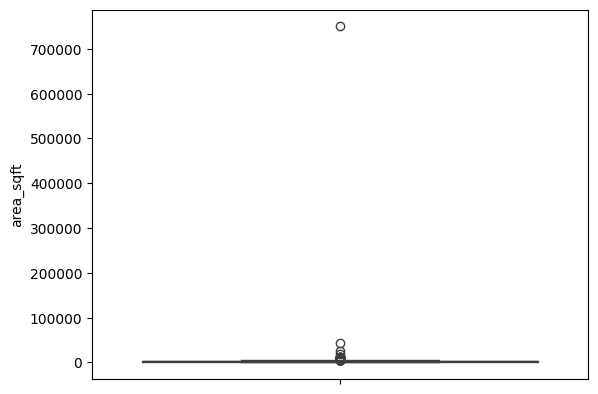

In [358]:
sns.boxplot(df['area_sqft'])
plt.show()

In [ ]:
def removing_outlier():
    pass

<Axes: ylabel='BHK'>

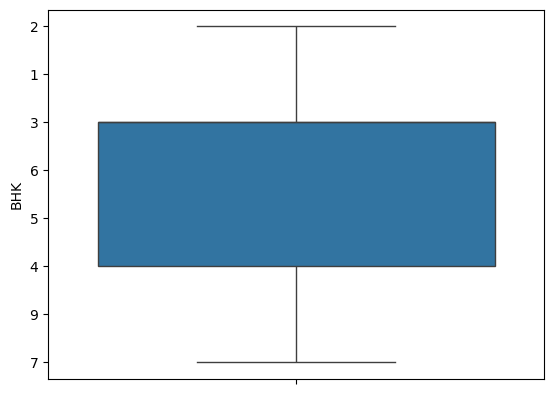

In [359]:
sns.boxplot(df['BHK'])